In [1]:
import sys
import numpy              as     np
import pylab              as     pl
import astropy.io.fits    as     fits

from   astropy.table      import Table
from   matplotlib.pyplot  import figure

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/')
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/')

In [3]:
from   schechter          import schechter
from   GAMA.define_sample import define_sample
from   GAMA.gama_params   import gama_params

In [4]:
version = 0.0

In [5]:
bright_merge_obs = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/GAMA/bright_v{:.1f}.fits'.format(version))
bright_merge_obs

CATAID,GAMA_NAME,IC_FLAG,N_SPEC,N_GAMA_SPEC,DIST,SPECID,SURVEY,SURVEY_CODE,RA,DEC,WMIN,WMAX,NQ,PROB,FILENAME,URL,URL_IMG,ZGAMA,RELEASE,BRICKID,BRICKNAME,OBJID,TYPE,RA_IVAR,DEC_IVAR,DCHISQ [5],EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,NOBS_G,NOBS_R,NOBS_Z,NOBS_W1,NOBS_W2,NOBS_W3,NOBS_W4,RCHISQ_G,RCHISQ_R,RCHISQ_Z,RCHISQ_W1,RCHISQ_W2,RCHISQ_W3,RCHISQ_W4,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACFLUX_W1,FRACFLUX_W2,FRACFLUX_W3,FRACFLUX_W4,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,ANYMASK_G,ANYMASK_R,ANYMASK_Z,ALLMASK_G,ALLMASK_R,ALLMASK_Z,WISEMASK_W1,WISEMASK_W2,PSFSIZE_G,PSFSIZE_R,PSFSIZE_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,PSFDEPTH_W1,PSFDEPTH_W2,WISE_COADD_ID,SHAPE_R,SHAPE_R_IVAR,SHAPE_E1,SHAPE_E1_IVAR,SHAPE_E2,SHAPE_E2_IVAR,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,REF_CAT,REF_ID,REF_EPOCH,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PMRA,PMRA_IVAR,PMDEC,PMDEC_IVAR,MASKBITS,FITBITS,SERSIC,SERSIC_IVAR,GMAG,GMAG_DRED,RMAG,RMAG_DRED,FIBER_RMAG,FIBER_RMAG_DRED,GMR,GMR_DRED,BGS_A_SUCCESS,BGS_A_WEIGHT,BGS_Z_SUCCESS,BGS_Z_WEIGHT
int32,bytes23,int16,int16,int16,float32,bytes33,bytes9,int16,float64,float64,float32,float64,int16,float32,bytes67,bytes88,bytes92,float32,int16,int32,bytes8,int32,bytes3,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes2,int64,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,uint8,float32,float32,float32,float32,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,float64,bool,float64
6802,GAMAJ113601.43+004315.3,4104,1,1,0.07,G12_Y3_017_187,GAMA,5,174.006,0.72093,3727.71,8857.67,4,1.0,/GAMA/dr3/data/spectra/gama/reduced_27/1d/G12_Y3_017_187.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/G12_Y3_017_187.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/png/G12_Y3_017_187.png,0.05054,9010,335384,1741p007,166,SER,6097167000000.0,3554916000000.0,381401.0 .. 493445.7,0.022343121,21.990646,36.444214,50.733025,37.640892,27.248919,21.993412,925.2927,304.3041,207.21066,27.616196,2.2400048,0.538826,0.0007735326,1.0688897e-05,0.93599963,0.95642483,0.97538704,0.99622065,0.9976773,0.99950415,0.9998127,5,6,4,176,164,14,14,1.3557901,1.2377856,1.2912774,1.0331075,0.3406912,0.4654759,0.16448326,0.00094854936,0.0046535768,0.0043984763,0.028020555,0.12548734,1.6617776,1.37349,0.013087122,0.019209547,0.002527629,0.9996716,0.9996256,0.9993272,0,0,0,0,0,0,0,0,1.5661247,1.6137096,1.2967077,1548.8694,829.2074,100.58068,1023.8579,550.0185,55.851147,3.8401518,0.67107224,1739p000,1.1175152,162410.84,0.2640286,187589.53,0.3291246,199361.88,7.9292564,13.140839,18.293013,7.9302425,13.149607,18.309229,,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.90348786,5671.4395,19.144405,19.072594,18.5

In [6]:
derived = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/GAMA/bright_derived_v{:.1f}.fits'.format(version))
derived

TARGETID,ROSETTE,BGS_Z_SUCCESS,INSAMPLE,BGS_Z_WEIGHT,BGS_A_WEIGHT,VOLUME,MRH,REF_GMR0P1,REF_GMR0P0,ZMAX,IVMAX,VONVMAX
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,-99.0,1.0,1.0,1.0,1.0,16409807.343780374,-17.39729842584402,0.5706801657915367,0.5319278986852018,0.07802796226295215,1.557523032753971e-08,0.2555865290099319
1,-99.0,1.0,1.0,1.0,1.0,7869660143.534193,-21.42845329908612,0.5560876941825513,0.5245845025978818,0.5149494637177621,2.606542366803503e-11,0.2051260257646681
2,-99.0,1.0,1.0,1.0,1.0,2200988301.071046,-21.109190687375566,0.8399983738258814,0.7703383967436309,0.3370816456407112,1.1947462991215985e-10,0.2629622627114567
3,-99.0,1.0,1.0,1.0,1.0,7464165470.660195,-21.580878134418448,0.8329401903766268,0.768812270083069,0.3971428496653372,6.671148360781645e-11,0.49794555244197725
4,-99.0,1.0,1.0,1.0,1.0,30735561828.278416,-21.67433600239021,0.6111636873574794,0.5710547018753381,0.5507868130684358,2.0371040155974714e-11,0.6261153642203032
5,-99.0,1.0,1.0,1.0,1.0,60079493.25774407,-16.82318772454439,0.4539379421110262,0.4343482307910662,0.060242143445876147,3.5203943778031295e-08,2.1150351028582324
6,-99.0,1.0,1.0,1.0,1.0,17414296918.661625,-21.727632372627923,0.6837061245354721,0.6445974249121365,0.433950912205383,4.851882974777558e-11,0.8449213073737563
7,-99.0,1.0,1.0,1.0,1.0,6236.618362271495,-12.45866347498344,-0.6929039075736543,-0.6594678064006539,0.008174203089765797,1.59328745672731e-05,0.09936725809002392
8,-99.0,1.0,1.0,1.0,1.0,51437571.3437664,-19.149496401768932,0.5625237813728928,0.5262410742274964,0.1764817877863543,1.1001221322582412e-09,0.056587610664889695


In [7]:
len(bright_merge_obs), len(derived)

(159042, 159042)

In [8]:
isin             = define_sample(bright_merge_obs)

bright_merge_obs = bright_merge_obs[isin]
derived          = derived[isin]

In [9]:
np.mean(isin)

0.8078117729907823

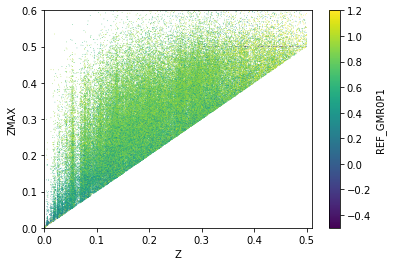

In [10]:
pl.scatter(bright_merge_obs['ZGAMA'], derived['ZMAX'], c=derived['REF_GMR0P1'], marker='.', lw=0.0, s=2, vmin=-0.5, vmax=1.2)

pl.xlabel('Z')
pl.ylabel('ZMAX')

pl.xlim(0.0, 0.51)
pl.ylim(0.0, 0.60)

pl.colorbar(label='REF_GMR0P1')

Text(0, 0.5, 'DEC')

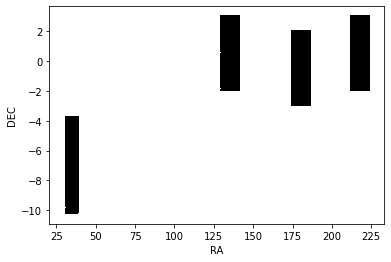

In [11]:
pl.plot(bright_merge_obs['RA'], bright_merge_obs['DEC'], marker=',', lw=0.0, c='k')

pl.xlabel('RA')
pl.ylabel('DEC')

In [12]:
derived['PHIKERNEL']   = bright_merge_obs['BGS_A_WEIGHT'] * derived['BGS_Z_WEIGHT'] * derived['IVMAX']
derived['PHIKERNEL']  /= gama_params['fsky']

In [13]:
derived['MRH_IDX']        = np.digitize(derived['MRH'], bins=np.arange(-24.0, -10.0, 0.5))

derived_grouped           = derived.group_by(['MRH_IDX'])
derived_grouped['NGROUP'] = 1

derived_addbinned         = derived_grouped['BGS_Z_WEIGHT', 'MRH', 'PHIKERNEL', 'NGROUP'].groups.aggregate(np.add)
derived_mnbinned          = derived_grouped['BGS_Z_WEIGHT', 'MRH', 'PHIKERNEL'].groups.aggregate(np.mean)

In [14]:
derived_addbinned

BGS_Z_WEIGHT,MRH,PHIKERNEL,NGROUP
float64,float64,float64,int64
5.0,-195.41806500721418,-17350.15772870016,5
74.0,-1750.3090487586285,1.5581734767921837e-07,74
531.0,-12307.269218446325,1.5848535153271236e-06,531
2522.0,-57238.37886601702,1.0882365833782139e-05,2522
7397.0,-164318.01579065592,4.708765688529367e-05,7397
14271.0,-310126.6214922802,0.0001418734745272945,14271
20241.0,-429885.08499016124,0.0003263173089429065,20241
22941.0,-476051.37307672005,0.000619337678561118,22941
20562.0,-416546.8048543635,0.0010132983670526918,20562


In [16]:
isin = derived_addbinned['NGROUP'] > 10

Text(0.5, 1.0, 'GAMA Bright')

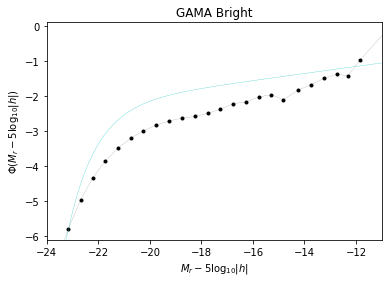

In [17]:
Ms                     = np.arange(-24., -10., 0.01)

pl.plot(derived_mnbinned['MRH'][isin], np.log10(derived_addbinned['PHIKERNEL'][isin]), marker='.', c='k', lw=0.1)
pl.plot(Ms, np.log10(schechter(Ms)), c='c', lw=0.25)

pl.xlim(-24., -11.)
pl.ylim(-6.1,  0.1)

pl.xlabel(r'$M_r - 5\log_{10}|h|$')
pl.ylabel(r'$\Phi(M_r - 5\log_{10}|h|)$')

pl.title('GAMA Bright')

# Done.